# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [81]:
bcdf = pd.read_csv('bc2.csv')
bcdf.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [82]:
bcdf.shape

(699, 11)

In [83]:
bcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Use summary statistics to check if missing values, outlier and encoding treatment is necessary


In [84]:
bcdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,699,NaN,NaN,NaN,1.0717e+06,617096,61634,870688,1.17171e+06,1.2383e+06,1.34544e+07
ClumpThickness,699,NaN,NaN,NaN,4.41774,2.81574,1,2,4,6,10
Cell Size,699,NaN,NaN,NaN,3.13448,3.05146,1,1,1,5,10
Cell Shape,699,NaN,NaN,NaN,3.20744,2.97191,1,1,1,5,10
Marginal Adhesion,699,NaN,NaN,NaN,2.80687,2.85538,1,1,1,4,10
Single Epithelial Cell Size,699,NaN,NaN,NaN,3.21602,2.2143,1,2,2,4,10
Bare Nuclei,699,11,1,402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Normal Nucleoli,699,NaN,NaN,NaN,3.43777,2.43836,1,2,3,5,10
Bland Chromatin,699,NaN,NaN,NaN,2.86695,3.05363,1,1,1,4,10
Mitoses,699,NaN,NaN,NaN,1.58941,1.71508,1,1,1,1,10


### Check Missing Values

In [85]:
bcdf.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [93]:
bcdf[['Bare Nuclei']] == '?'

,Bare Nuclei
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [87]:
(bcdf[['Bare Nuclei']] == '?').sum()

Bare Nuclei    16
dtype: int64

In [96]:
bcdf['Bare Nuclei'].replace('?', 1,inplace=True)

In [98]:
(bcdf[['Bare Nuclei']] == '?').sum()

Bare Nuclei    0
dtype: int64

### Print and plot the distribution of target variable (Class - using Histogram) 

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


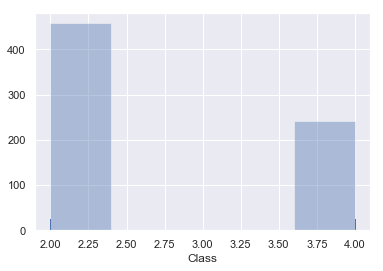

In [101]:
sns.distplot(bcdf['Class'], kde=False, rug=True);

In [102]:
bcdf['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### convert the datatype of Bare Nuclei to `int`

In [103]:
bcdf['Bare Nuclei'].astype(str).astype(int)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: int32

### Standardization of Data (Use Standard Scaler)

In [108]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bcdf)
scaled_features_df = pd.DataFrame(scaled_data, index=bcdf.index, columns=bcdf.columns)
scaled_features_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
5,-0.088513,1.273138,2.251526,2.287222,1.820022,1.710106,1.799664,2.282766,1.354454,-0.343912,1.378555
6,-0.086929,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,1.799664,-0.179662,-0.611825,-0.343912,-0.725397
7,-0.086180,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
8,-0.062638,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,1.990014,-0.725397
9,-0.062638,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912,-0.725397


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FA866A0>,
      dtype=object)

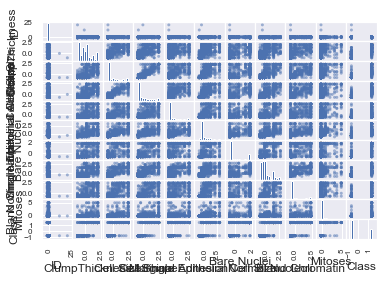

In [130]:
from pandas.tools.plotting import scatter_matrix
pd.plotting.scatter_matrix(scaled_features_df, alpha=0.5, range_padding=0.5)

In [131]:
scaled_features_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [140]:
b1 = scaled_features_df.drop(['ID','Cell Shape'],axis=1)
b1.head(10)

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,0.206936,-0.699995,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
1,0.206936,0.283845,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912,-0.725397
2,-0.503866,-0.699995,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912,-0.725397
3,0.562336,1.595632,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912,-0.725397
4,-0.148465,-0.699995,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
5,1.273138,2.251526,1.820022,1.710106,1.799664,2.282766,1.354454,-0.343912,1.378555
6,-1.214667,-0.699995,-0.633247,-0.549561,1.799664,-0.179662,-0.611825,-0.343912,-0.725397
7,-0.859266,-0.699995,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912,-0.725397
8,-0.859266,-0.699995,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,1.990014,-0.725397
9,-0.148465,-0.372048,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912,-0.725397


In [154]:
from sklearn.preprocessing import LabelEncoder
b2 = b1.apply(LabelEncoder().fit_transform)
b2.head(10)

,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,4,0,0,1,0,2,0,0,0
1,4,3,4,6,9,2,1,0,0
2,2,0,0,1,1,2,0,0,0
3,5,7,0,2,3,2,6,0,0
4,3,0,2,1,0,2,0,0,0
5,7,9,7,6,9,8,6,0,1
6,0,0,0,1,9,2,0,0,0
7,1,0,0,1,0,2,0,0,0
8,1,0,0,1,0,0,0,4,0
9,3,1,0,1,0,1,0,0,0


### Divide the dataset into feature set and target set

In [155]:
X = b2.drop(['Class'],axis=1)
y = b2[['Class']]

### Divide the Training and Test sets in 70:30 

In [156]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=0)

### Model 1 : Implement a default Decision Tree model with no attributes

In [157]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0)

In [158]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [159]:
print(dict(zip(b2.columns, dt_model.feature_importances_)))

{'ClumpThickness': 0.0532532617439486, 'Cell Size': 0.7233554688577194, 'Marginal Adhesion': 0.016743390448010556, 'Single Epithelial Cell Size': 0.015930818719356934, 'Bare Nuclei': 0.1416476839119552, 'Normal Nucleoli': 0.01366531129441379, 'Bland Chromatin': 0.035404065024595546, 'Mitoses': 0.0}


### Check the training & test accuracy of model 1 

In [160]:
y_pred=dt_model.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

0.9285714285714286


In [169]:
cm1=metrics.confusion_matrix(test_labels,y_pred) # confusion matrix

In [161]:
y_pred_train=dt_model.predict(train_set)   # performance on train data
acc_train=metrics.accuracy_score(train_labels,y_pred_train)
print(acc_train)

1.0


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [162]:
dt_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_leaf_nodes = 5)
dt_model2.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [164]:
y_pred=dt_model2.predict(test_set)   # performance on test data
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

0.9476190476190476


In [170]:
cm2=metrics.confusion_matrix(test_labels,y_pred) # confusion matrix

In [165]:
y_pred_train=dt_model2.predict(train_set)   # performance on train data
acc_train=metrics.accuracy_score(train_labels,y_pred_train)
print(acc_train)

0.9713701431492843


### Print the confusion matrix of model 1 and model 2

In [171]:
print(cm1) # confusion matrix for model 1

[[126   9]
 [  2  73]]


In [172]:
print(cm2) # confusion matrix for model 2

[[126   9]
 [  2  73]]
